In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your data
# Assuming your data is in a CSV file
df = pd.read_csv('2August.csv')


# Split data into features and labels
X = df.iloc[:, :-1].values  # all rows, all columns except the last one
y = df.iloc[:, -1].values   # all rows, only the last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')  # 9 classes for diseases (0-8)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/50
46/46 [==============================] - 1s 13ms/step - loss: 1.8063 - accuracy: 0.4780 - val_loss: 1.3223 - val_accuracy: 0.7383
Epoch 2/50
46/46 [==============================] - 0s 5ms/step - loss: 0.9523 - accuracy: 0.8251 - val_loss: 0.7259 - val_accuracy: 0.8264
Epoch 3/50
46/46 [==============================] - 0s 5ms/step - loss: 0.5382 - accuracy: 0.8939 - val_loss: 0.4878 - val_accuracy: 0.8623
Epoch 4/50
46/46 [==============================] - 0s 5ms/step - loss: 0.3698 - accuracy: 0.9222 - val_loss: 0.3832 - val_accuracy: 0.8871
Epoch 5/50
46/46 [==============================] - 0s 5ms/step - loss: 0.2839 - accuracy: 0.9360 - val_loss: 0.3281 - val_accuracy: 0.9063
Epoch 6/50
46/46 [==============================] - 0s 5ms/step - loss: 0.2329 - accuracy: 0.9387 - val_loss: 0.2884 - val_accuracy: 0.9174
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 0.1996 - accuracy: 0.9456 - val_loss: 0.2655 - val_accuracy: 0.9201
Epoch 8/50
46/46 [=

In [3]:
# Define the features you need to collect from the user
features = ['Gender', 'Age', 'GLUCOSE', 'HBA1C', 'CREATININE', 'BUN', 'HGB', 'Ferr',
            'TROPONIN_I', 'CK', 'CK_MB', 'TRIGLYCERIDE', 'HDL_CHOLESTEROL',
            'LDL_CHOLESTEROL', 'CRP', 'PCT', 'FT4', 'TSH']

while True:
    # Collect the data from the user
    new_patient_data = []
    for feature in features:
        while True:
            try:
                value = float(input(f'Enter value for {feature}: '))
                new_patient_data.append(value)
                break
            except ValueError:
                print("You have to write a number. Please try again.")

    # Convert the list to a numpy array and reshape it to match the model's input shape
    new_patient_data = np.array(new_patient_data).reshape(1, -1)

    # Standardize the new patient data using the same scaler
    new_patient_data = scaler.transform(new_patient_data)

    # Predict on new data
    prediction = model.predict(new_patient_data)
    predicted_class = np.argmax(prediction)
    predicted_probability = np.max(prediction)

    print(f'Predicted Disease Class: {predicted_class}')
    print(f'Prediction Probability: {predicted_probability * 100:.2f}%')

    # Convert prediction distributions to percentages
    prediction_percentages = prediction[0] * 100
    print('Prediction Distribution (%):')
    for i, prob in enumerate(prediction_percentages):
        print(f'Class {i}: {prob:.2f}%')

    # Ask the user if they want to enter another patient's data
    another = input("Do you want to enter another patient's data? (yes/no): ")
    if another.lower() != 'yes':
        break


Enter value for Gender:  1
Enter value for Age:  23
Enter value for GLUCOSE:  110
Enter value for HBA1C:  5.2
Enter value for CREATININE:  2.3
Enter value for BUN:  13
Enter value for HGB:  13
Enter value for Ferr:  15
Enter value for TROPONIN_I:  25
Enter value for CK:  156
Enter value for CK_MB:  23
Enter value for TRIGLYCERIDE:  115
Enter value for HDL_CHOLESTEROL:  55
Enter value for LDL_CHOLESTEROL:  147
Enter value for CRP:  4
Enter value for PCT:  0.2
Enter value for FT4:  0.6
Enter value for TSH:  0.6


1/1 [==============================] - 0s 141ms/step
Predicted Disease Class: 6
Prediction Probability: 90.88%
Prediction Distribution (%):
Class 0: 0.07%
Class 1: 0.54%
Class 2: 1.06%
Class 3: 4.69%
Class 4: 0.02%
Class 5: 2.70%
Class 6: 90.88%
Class 7: 0.00%
Class 8: 0.03%


Do you want to enter another patient's data? (yes/no):  no


In [ ]:
Enter value for Gender:  1
Enter value for Age:  23
Enter value for GLUCOSE:  110
Enter value for HBA1C:  5.2
Enter value for CREATININE:  2.3
Enter value for BUN:  13
Enter value for HGB:  13
Enter value for Ferr:  15
Enter value for TROPONIN_I:  25
Enter value for CK:  156
Enter value for CK_MB:  23
Enter value for TRIGLYCERIDE:  115
Enter value for HDL_CHOLESTEROL:  55
Enter value for LDL_CHOLESTEROL:  147
Enter value for CRP:  4
Enter value for PCT:  0.2
Enter value for FT4:  0.6
Enter value for TSH:  0.6

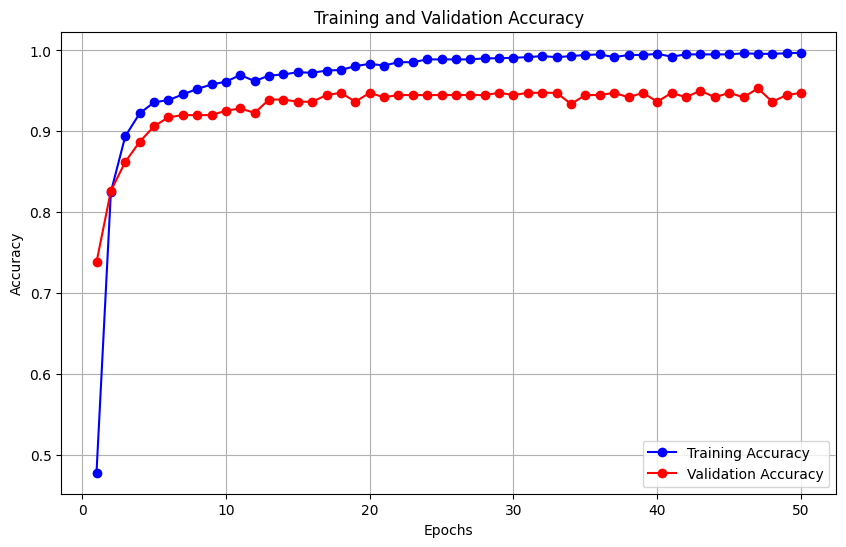

In [4]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


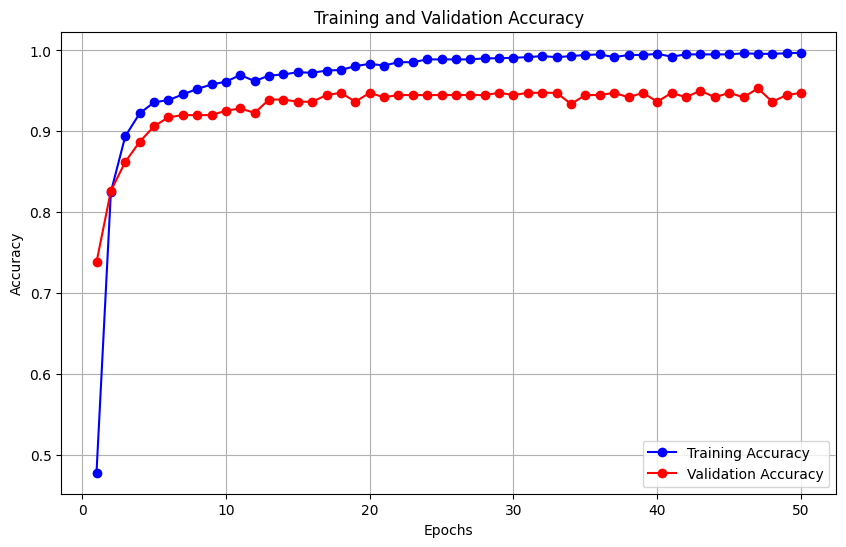

In [12]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Save the figure as a PNG file
plt.savefig('accuracy_plot.png', format='png', dpi=300)  # You can change the filename and dpi as needed

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'accuracy' contains your final test accuracy value
test_accuracy = accuracy * 100  # Convert to percentage if needed

# Plotting the test accuracy
plt.figure(figsize=(6, 4))
plt.plot(['Test Accuracy'], [test_accuracy], color='green')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Test Accuracy')
plt.text(0, test_accuracy + 1, f'{test_accuracy:.2f}%', ha='center', va='bottom', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [6]:
# Ensure that you extract accuracy correctly when evaluating the model
loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy = test_accuracy * 100  # Convert to percentage if needed


15/15 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.9670


In [ ]:
import matplotlib.pyplot as plt

# Plotting the test accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Test Accuracy'], [test_accuracy], color='green')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Test Accuracy')
plt.text(0, test_accuracy + 1, f'{test_accuracy:.2f}%', ha='center', va='bottom', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


15/15 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.9670


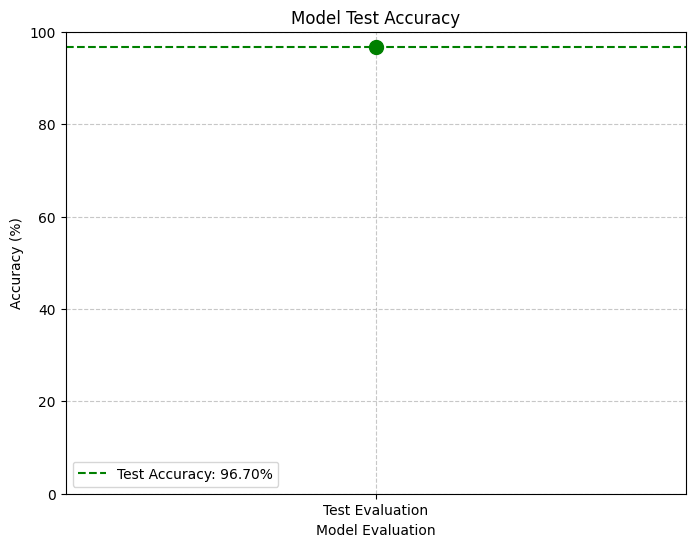

In [9]:
import matplotlib.pyplot as plt

# Ensure that test_accuracy is correctly set as a scalar
loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy = test_accuracy * 100  # Convert to percentage if needed

# Create a plot to display test accuracy as a single point
plt.figure(figsize=(8, 6))
plt.plot(1, test_accuracy, 'go', markersize=10)  # 'go' means green circle marker
plt.axhline(y=test_accuracy, color='green', linestyle='--', label=f'Test Accuracy: {test_accuracy:.2f}%')
plt.title('Model Test Accuracy')
plt.xlabel('Model Evaluation')
plt.ylabel('Accuracy (%)')
plt.xticks([1], ['Test Evaluation'])
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarize the labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=np.arange(9))  # assuming classes are 0-8
y_pred_prob = model.predict(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(9):  # For each class
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(9))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()
